ロジスティック回帰

In [25]:
#　データの取り込み
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
import pandas as pd
data1=pd.DataFrame(iris.data,columns=iris.feature_names)
data2=pd.DataFrame(iris.target,columns=["Species"])

data1_1=data1[50:150]
data2_1=data2[50:150]

data1_1=np.array(data1_1)
data2_1=np.array(data2_1)

from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(data1_1,data2_1)


train_y=train_y.reshape(len(train_y),1)
test_y=test_y.reshape(len(test_y),1)

In [26]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_X)
train_X1sd=scaler.transform(train_X)
test_X1sd=scaler.transform(test_X)

完成雛形

In [2]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    def __init__(self, num_iter, lr,threshold,seisoku,bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.seisoku=seisoku
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
        # 学習過程を記録する配列を用意
        self.verbose_list=[]
        self.verbose_list_val=[]
        
        # predict_probaの時の閾値
        self.threshold= threshold
        
        
    def _gradient_descent(self,X,y,i,X_val, y_val):
        
        logi=-((self.param).T@X.T)
        suitei_y=np.array(1)/(np.array(1)+np.exp(logi))
        
        a1=suitei_y-y.T
        a2=a1@X
    
        a3=self.seisoku*self.param
        a4=a3/(len(X))
        a4=a4.T
        a5=a2+a4
        
        a6=self.param-np.array(self.lr)*a5.T
        self.param=a6
        self.verbose_list.append(self.param)
        self.coef=self.param
                
        # lossを計算
        import math        
        y1=y.T
        logi1=-((self.coef).T@X.T)
        suitei_y1=np.array(1)/(np.array(1)+np.exp(logi1))
        aa1=np.log(suitei_y1)
        aa1=aa1.reshape(len(X),1)
        aa3=aa2=-(y1@aa1)            
        
        aa11=1-aa1        
        y11=1-y1        
        aa4=y11@aa11
        
        aa5=aa3-aa4
        aa6=aa5/np.array(len(y))
        
        # 正則化の項
        bb1=(self.coef.T)@self.coef
        bb2=np.array([self.seisoku/(len(y)*2)])*bb1
        
        loss=aa3+bb2
        self.loss[i]=loss
            
        if X_val is not None:            
            y1=y_val.T
            logi1=-((self.coef).T@X_val.T)
            suitei_y1=np.array(1)/(np.array(1)+np.exp(logi1))
            aa1=np.log(suitei_y1)
            aa1=aa1.reshape(len(X_val),1)
            aa3=aa2=-(y1@aa1)            

            aa11=1-aa1        
            y11=1-y1        
            aa4=y11@aa11

            aa5=aa3-aa4
            aa6=aa5/np.array(len(y_val))

            # 正則化の項
            bb1=(self.coef.T)@self.coef
            bb2=np.array([self.seisoku/(len(y_val)*2)])*bb1

            loss=aa3+bb2
            self.val_loss[i]=loss
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        
        #　定数項を作成
        if self.bias==False:
            X_bias=np.ones(len(X))
            X=np.insert(X,0,X_bias,axis=1)
            if X_val is not None:
                X_bias_val=np.ones(len(X_val))                       
                X_val=np.insert(X_val,0,X_bias_val,axis=1)
            
            
        #　初期値　０で設定
        param=np.zeros(X.shape[1])
        self.param=param.reshape(len(param),1)
        
        for i in range(self.iter):
            self._gradient_descent(X,y,i,X_val, y_val)
        
        #verboseをTrueにした際は学習過程を出力   
        if self.verbose:
            print(self.verbose_list)                                                                                        
                
    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        shikii:閾値
        
        Returns
        -------
        y_pred:　0か1かの値を返す　ロジスティック回帰による推定結果
        """
        import numpy as np
        
        logi=-((self.param).T@X.T)
        y_pred=np.array(1)/(np.array(1)+np.exp(logi))
        
        y_pred_list=[]
        for i in range(y_pred.shape[1]):
            if y_pred[0,i]>=self.threshold:
                y_pred_list.append(1)
            else:
                y_pred_list.append(0)
        
        y_pred=np.array(y_pred_list)      
        
        return y_pred
    
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
            
        Returns
        -------
        y_pred: ロジスティック回帰による推定結果
        """
        logi=-((self.param).T@X.T)
        y_pred=np.array(1)/(np.array(1)+np.exp(logi))                
        
        return y_pred

In [ ]:
# 実装実行例

In [54]:
SLG2=ScratchLogisticRegression(3000,0.7,0.5,0.5,bias=True,verbose=False)
SLG2.fit(train_X1sd,train_y,test_X1sd,test_y)

In [55]:
SLG2.coef

array([[-1.99429125],
       [-1.18485432],
       [ 5.33587476],
       [ 5.60810225]])

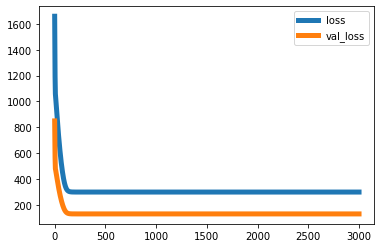

In [56]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1,len(SLG2.loss)+1),SLG2.loss,label='loss',linewidth=5)
plt.plot(np.arange(1,len(SLG2.val_loss)+1),SLG2.val_loss,label='val_loss',linewidth=5)
plt.legend()
plt.show()

In [191]:
SLG2.predict_proba(test_X1sd)

array([[9.99834100e-01, 9.99980442e-01, 9.99996169e-01, 5.89372773e-04,
        9.99999990e-01, 7.00858145e-05, 7.09231337e-07, 5.99351547e-07,
        8.89446529e-09, 9.99820025e-01, 9.99999993e-01, 3.17653465e-08,
        6.87157735e-01, 2.69627993e-09, 1.00000000e+00, 2.32581583e-07,
        1.00000000e+00, 9.99979352e-01, 3.24176583e-04, 9.99999771e-01,
        3.91406395e-01, 9.84859240e-01, 2.65157555e-07, 6.11452491e-05,
        9.99999997e-01]])

In [192]:
SLG2.predict(test_X1sd)

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1])

In [ ]:
# sklearnの例

In [50]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
train_y1=train_y.reshape(len(train_y),)
clf.fit(train_X1sd,train_y1)
y_pred=clf.predict(train_X1sd)

In [51]:
clf.coef_

array([[-0.18811207, -0.53619718,  2.05683708,  2.24088773]])

標準化しない場合

In [52]:
SLG3=ScratchLogisticRegression(3000,0.00001,0.5,0.5,bias=True,verbose=False)
SLG3.fit(train_X,train_y,test_X,test_y)

In [42]:
SLG2.coef

array([[-2.08627206],
       [-1.34365507],
       [ 6.39085701],
       [ 6.45239138]])

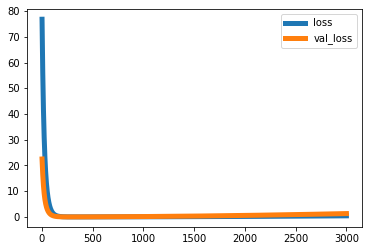

In [53]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1,len(SLG3.loss)+1),SLG3.loss,label='loss',linewidth=5)
plt.plot(np.arange(1,len(SLG3.val_loss)+1),SLG3.val_loss,label='val_loss',linewidth=5)
plt.legend()
plt.show()

【問題1】仮定関数

In [13]:
# ロジスティック回帰の仮定関数をここで仮の実装を行う
# 特徴量ベクトル(i行j列)とパラメータ（重み）ベクトル（j列）を使用する


def sample_Logistic(X,param):
    """
    線形の仮定関数を計算する
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    param : 次の形のndarray, shape (n_features,1)
    
    Returns
    -------
    y_pred :次の形のndarray, shape (n_samples, 1)
       線形の仮定関数による推定結果
    """
    
    import math
    # 式をわかりやすく、expの中身をlogiで定義しておく
    logi=-((self.param).T@X.T)
    y_pred=np.array(1)/(np.array(1)+np.exp(logi))
    
    return y_pred

【問題2】最急降下法・・・完成雛形の_gradient_descentの中で完成

【問題3】推定・・・完成雛形のpredict_proba、predictの中で完成

【問題4】目的関数・・・完成雛形の_gradient_descentのloss制作のところで完成

【問題5】学習と推定・・・雛形完成後一部を実行、AccuracyやPrecision、Recallなどを確認する

In [173]:
y_pred2=(SLG2.predict(test_X1sd,0.5))+1

In [174]:
# Accuracy（正解率）
from sklearn.metrics import accuracy_score
accuracy_score(test_y,y_pred2)

1.0

In [177]:
# Precision（適合率）
from sklearn.metrics import precision_score
precision_score(test_y,y_pred2)

1.0

In [178]:
# Recall（再現率）
from sklearn.metrics import recall_score
recall_score(test_y,y_pred2)

1.0

In [179]:
from sklearn.metrics import f1_score
f1_score(test_y,y_pred2)

1.0

たまたまではあると思うが、今回の場合は予測値と実際の値がピッタリと一致した
精度としてはまずまずであったと思われる。

【問題6】学習曲線のプロット・・・上の実装例のところで出力

【問題7】決定領域の可視化

In [199]:
# 可視化のために特徴量を２つで行う
# sepallengthとpetallength
data1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [194]:
a=train_X1sd[:,2].reshape(75,1)
b=train_X1sd[:,0].reshape(75,1)
X1sd_a=np.concatenate([a,b],axis=1)

In [196]:
X1sd_a=np.concatenate([a,b],axis=1)

In [206]:
# 再度２つの説明変数で実装
SLG3=ScratchLogisticRegression(500,0.5,0.5,bias=True,verbose=False)
SLG3.fit(X1sd_a,train_y)

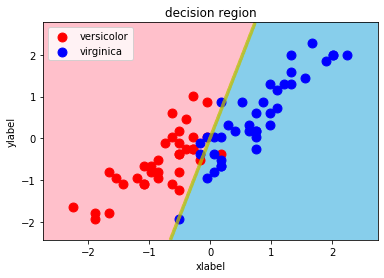

In [212]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
X=X1sd_a
y=train_y1
step=0.01
title='decision region'
xlabel='xlabel'
ylabel='ylabel'
target_names=['versicolor', 'virginica']
"""
2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
背景の色が学習したモデルによる推定値から描画される。
散布図の点は訓練データまたは検証データである。
Parameters
----------------
X : ndarray, shape(n_samples, 2)
    特徴量
y : ndarray, shape(n_samples,)
    ラベル
model : object
    学習したモデルのインスンタスを入れる
step : float, (default : 0.1)
    推定値を計算する間隔を設定する
title : str
    グラフのタイトルの文章を与える
xlabel, ylabel : str
    軸ラベルの文章を与える
target_names= : list of str
    凡例の一覧を与える
"""
# setting
scatter_color = ['red', 'blue']
contourf_color = ['pink', 'skyblue']
n_class = 2
# pred
mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
model_predict=SLG3.predict(mesh,0.5)
y_pred = model_predict.reshape(mesh_f0.shape)

# plot
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
for i, target in enumerate(set(y)):
    plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
plt.legend(handles=patches)
plt.legend()
plt.show()

決定領域を可視化することができた。若干領域を超えているものも見える。